# KNN Assignment - Glass

Dataset: glass.csv

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading dataset
df = pd.read_csv("C:/Users/Computer/Downloads/glass.csv")

# EDA & Data preprocessing

In [5]:
df.shape

(214, 10)

In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
148,1.51670,13.24,3.57,1.38,72.70,0.56,8.44,0.00,0.10,3
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07,1
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
82,1.51646,13.41,3.55,1.25,72.81,0.68,8.10,0.00,0.00,2
196,1.51556,13.87,0.00,2.54,73.23,0.14,9.41,0.81,0.01,7
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.00,0.10,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
108,1.52222,14.43,0.00,1.00,72.67,0.10,11.52,0.00,0.08,2
36,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00,1
53,1.51837,13.14,2.84,1.28,72.85,0.55,9.07,0.00,0.00,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [13]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [15]:
# Checking how many types of glass are present in dataset
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

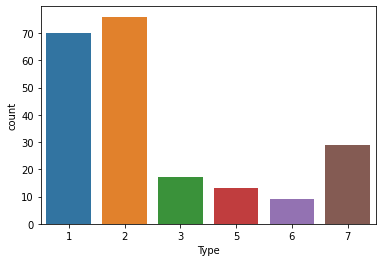

In [16]:
sns.countplot(x = 'Type', data = df)

<AxesSubplot:>

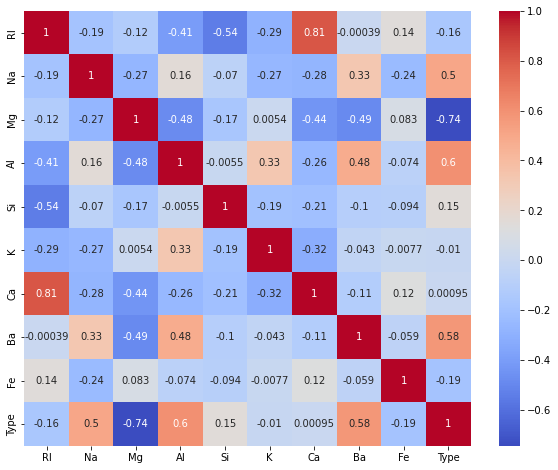

In [17]:
# Correlation heat map to see the relation between different parameters
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

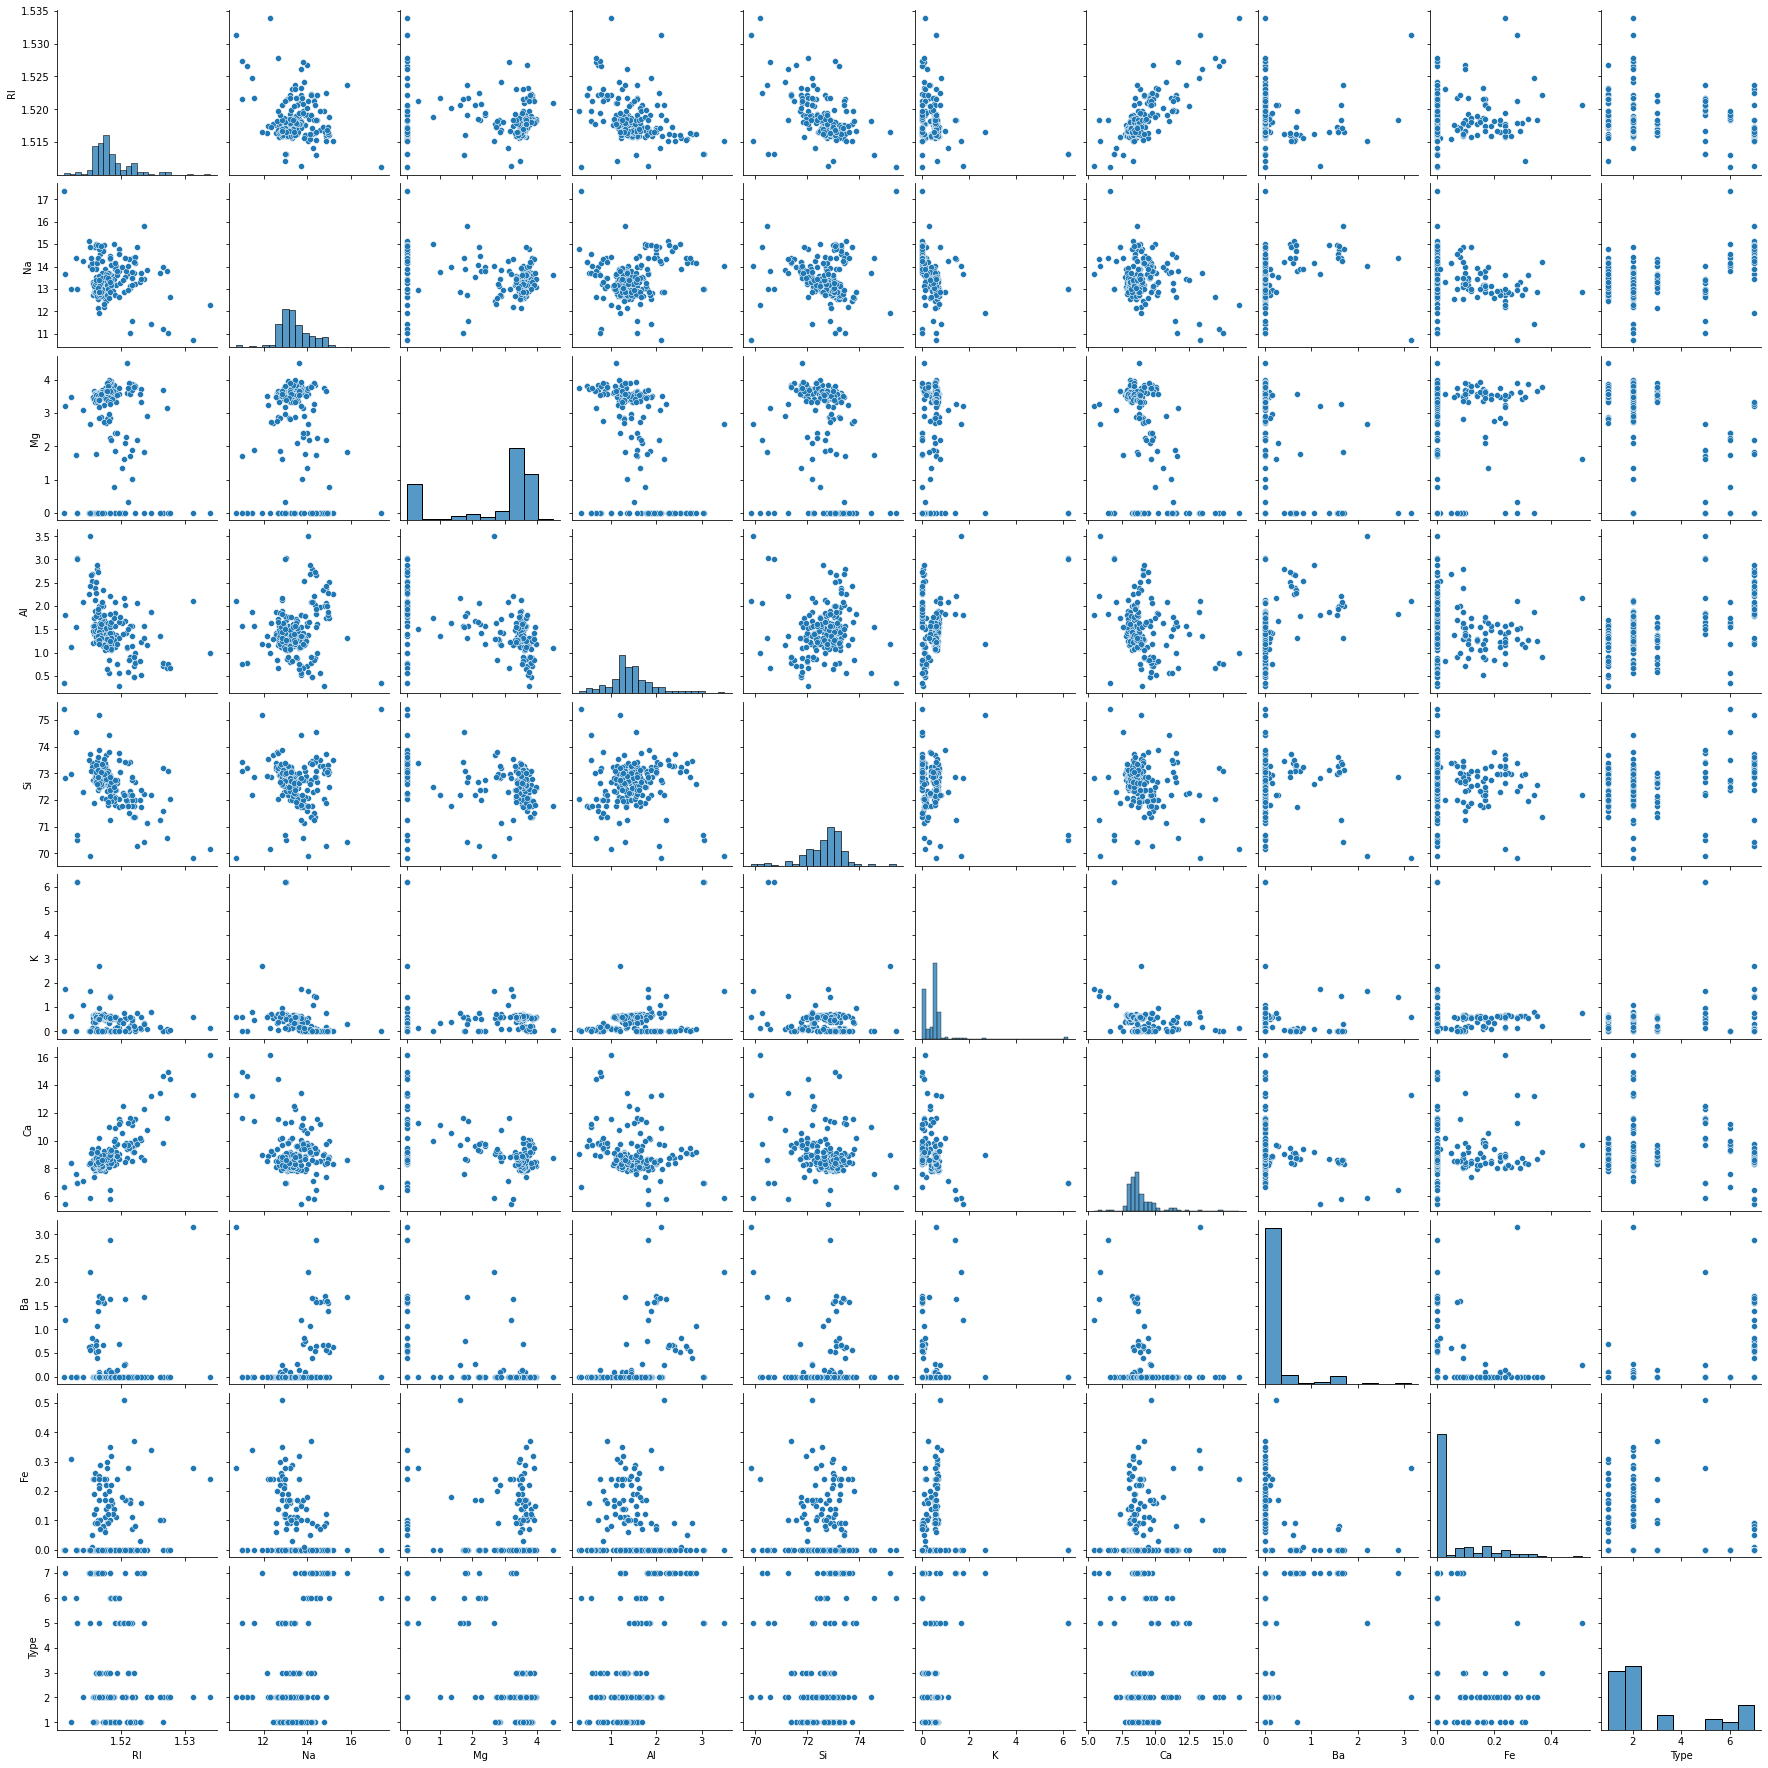

In [18]:
# plotting pairplot
sns.pairplot(data)

<AxesSubplot:xlabel='Type', ylabel='RI'>

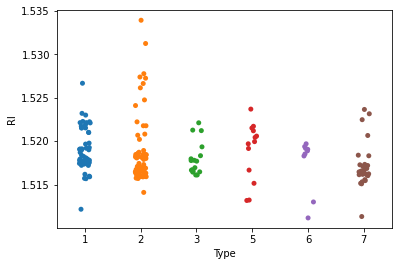

In [19]:
# Visualizing the content of different elements in the various types of glass
sns.stripplot(x='Type',y='RI',data=df)

<AxesSubplot:xlabel='Type', ylabel='Na'>

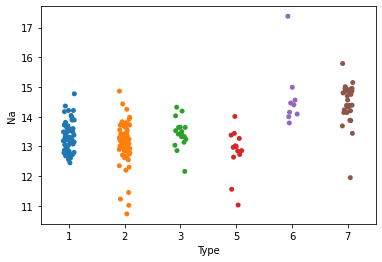

In [20]:
sns.stripplot(x='Type',y='Na',data=df)

<AxesSubplot:xlabel='Type', ylabel='Mg'>

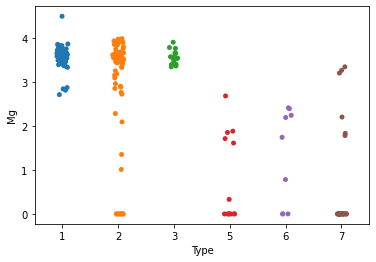

In [21]:
sns.stripplot(x='Type',y='Mg',data=df)

<AxesSubplot:xlabel='Type', ylabel='Al'>

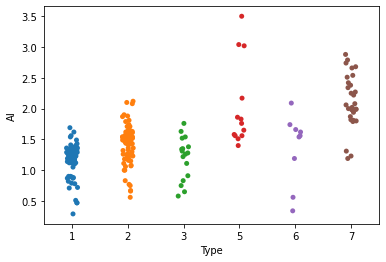

In [22]:
sns.stripplot(x='Type',y='Al',data=df)

<AxesSubplot:xlabel='Type', ylabel='Si'>

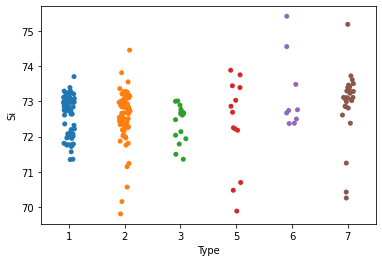

In [26]:
sns.stripplot(x='Type',y='Si',data=df)

<AxesSubplot:xlabel='Type', ylabel='K'>

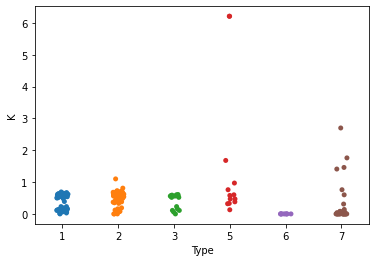

In [27]:
sns.stripplot(x='Type',y='K',data=df)

<AxesSubplot:xlabel='Type', ylabel='Ca'>

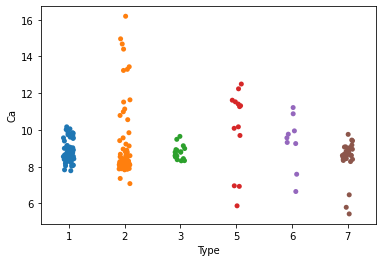

In [28]:
sns.stripplot(x='Type',y='Ca',data=df)

<AxesSubplot:xlabel='Type', ylabel='Ba'>

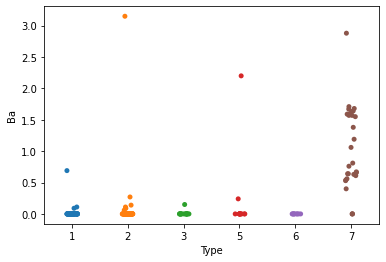

In [29]:
sns.stripplot(x='Type',y='Ba',data=df)

<AxesSubplot:xlabel='Type', ylabel='Fe'>

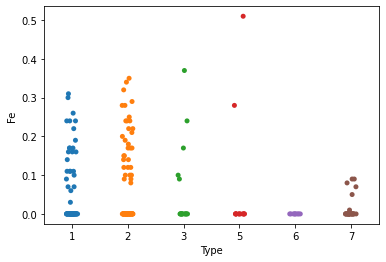

In [30]:
sns.stripplot(x='Type',y='Fe',data=df)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [33]:
scaled_features=scaler.transform(df.drop('Type',axis=1))
df_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [34]:
df_head

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [35]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_head,data['Type'], test_size=0.3, random_state=42)

In [36]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (149, 9)
Shape of x_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


# Building KNN model

In [37]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
pred = model.predict(x_test)

In [39]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 5, 1, 1, 2, 1, 7, 2, 2,
       2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 7, 2],
      dtype=int64)

In [40]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,2
135,2,2
56,1,1
199,7,7


In [41]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, x_train, y_train, cv=kfold)
print(results.mean())

0.650952380952381


In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.57      0.84      0.68        19
           2       0.59      0.57      0.58        23
           3       0.00      0.00      0.00         4
           5       0.67      0.33      0.44         6
           6       1.00      0.67      0.80         3
           7       0.90      0.90      0.90        10

    accuracy                           0.65        65
   macro avg       0.62      0.55      0.57        65
weighted avg       0.62      0.65      0.62        65



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[16  3  0  0  0  0]
 [ 9 13  0  1  0  0]
 [ 2  2  0  0  0  0]
 [ 1  3  0  2  0  0]
 [ 0  0  0  0  2  1]
 [ 0  1  0  0  0  9]]


In [44]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error_rate')

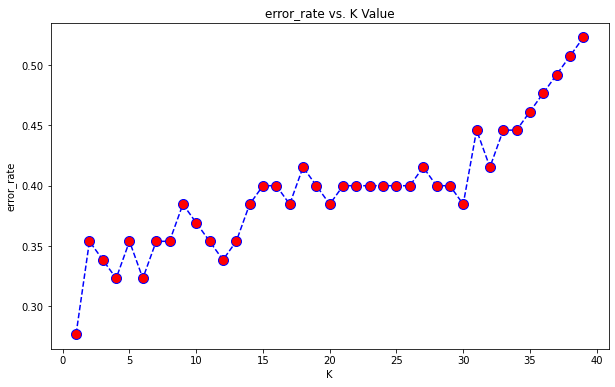

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('error_rate vs. K Value')
plt.xlabel('K')
plt.ylabel('error_rate')

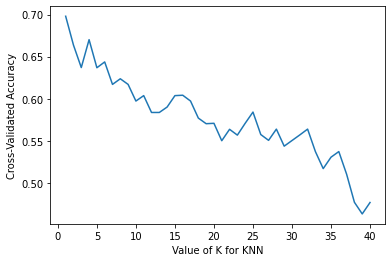

In [46]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We can see that at K=1 we have low error rate and high value of accuracy. Hence we will perform the test with K=1

In [47]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [48]:
pred=knn.predict(x_test)

In [49]:
pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 6, 1, 1, 6, 2, 7,
       7, 7, 2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 7, 5, 3, 2, 2, 1, 7, 3, 2,
       1, 6, 2, 3, 2, 1, 1, 1, 1, 2, 1, 2, 7, 1, 2, 1, 1, 2, 1, 7, 2],
      dtype=int64)

In [50]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df

,Actual,Predicted
9,1,1
197,7,7
66,1,1
191,7,7
117,2,2
...,...,...
5,1,1
135,2,2
56,1,1
199,7,7


In [51]:
kfold = KFold(n_splits=10)
results = cross_val_score(knn, x_train, y_train, cv=kfold)
print(results.mean())

0.699047619047619


In [52]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report ',classification_report(y_test,pred))

Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65



In [53]:
# Printing confusion matrix
print('Confusion Matrix\n',confusion_matrix(y_test,pred))

Confusion Matrix
 [[16  2  1  0  0  0]
 [ 6 15  1  0  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


We can see that accuracy is improved when K=1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

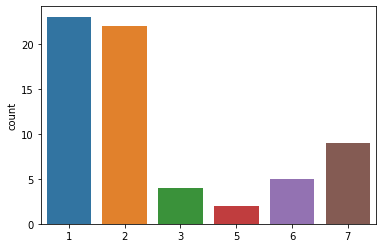

In [54]:
sns.countplot(pred)